<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº7
#### Tobías Guerrero

## 1. Introducción

En este trabajo semanal, se propone realizar la estimación espectral de una señal mediante los métodos de periodograma y de Welch.

Para ello, se cuenta con tres señales reales:
- Un electrocardiograma ECG.
- Una pletismografía PPG.
- Un archivo de audio.

Se realizará la estimación espectral de las tres. Además, la señal de ECG se analizará mediante los dos métodos para comparar los resultados.

## 2. Resolución

In [1]:
# Librerías a utilizar
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig
import numpy as np
import math
import wave
import struct

### 2.1 Audio mediante periodograma

Text(0.5, 1.0, 'Periodograma - La cucaracha')

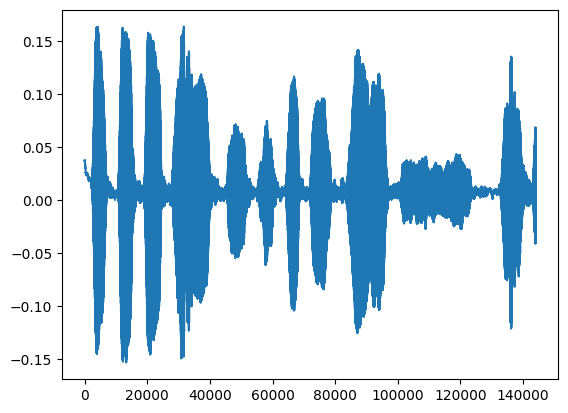

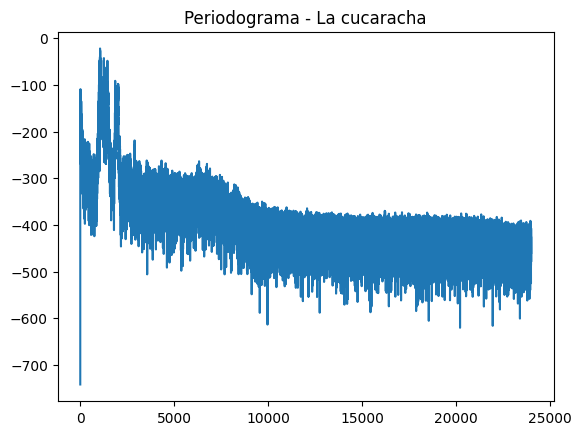

In [2]:
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')

f , audio = sig.periodogram(wav_data , fs = fs_audio , axis = 0)
N = len(audio)

audio = (np.abs(audio)**2) / N

area_audio = np.sum(audio)

audio_norm = 10*np.log(audio / area_audio)

plt.figure()
plt.plot(wav_data)
plt.figure()
plt.plot(f,audio_norm)
plt.title("Periodograma - La cucaracha")

## 3. Segunda señal - ECG mediante método de Welch

C:\Users\tobia\AppData\Local\Temp\ipykernel_18892\738004589.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-50,0)


(9.190503400897943e-13, 0.28787664162618193)

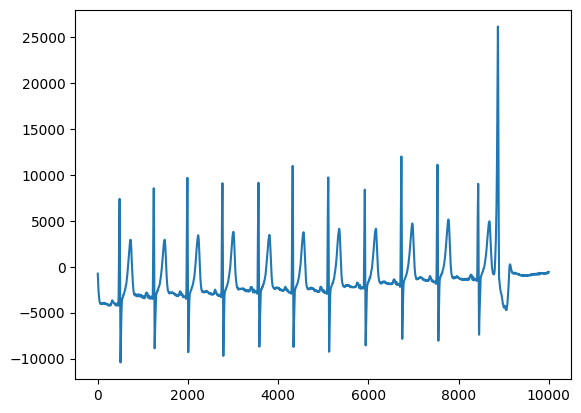

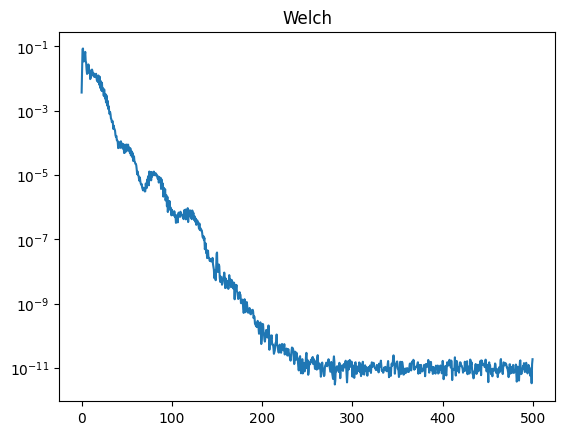

In [3]:
fs_ecg = 1000 # Hz

bw = 0

mat_struct = sio.loadmat("ECG_TP4.mat")
ecg_one_lead = mat_struct['ecg_lead']

#ecg_one_lead = np.flatten(ecg_one_lead)

muestra = ecg_one_lead[0:9999]
N = len(muestra)

f_welch , ECG_welch = sig.welch(muestra , fs = fs_ecg , nperseg = N/5 , axis = 0)

area_welch = np.sum(ECG_welch)

plt.figure()
plt.plot(muestra)
plt.figure()
plt.semilogy(f_welch,ECG_welch/area_welch)
plt.title("Welch")
#plt.xlim(-50,0)
plt.ylim(-50,0)

## 4. Tercera señal - Pletismografía mediante método de Welch

C:\Users\tobia\AppData\Local\Temp\ipykernel_18892\3804273035.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-50,0)


(1.6477393325289875e-09, 1.3486849102897855)

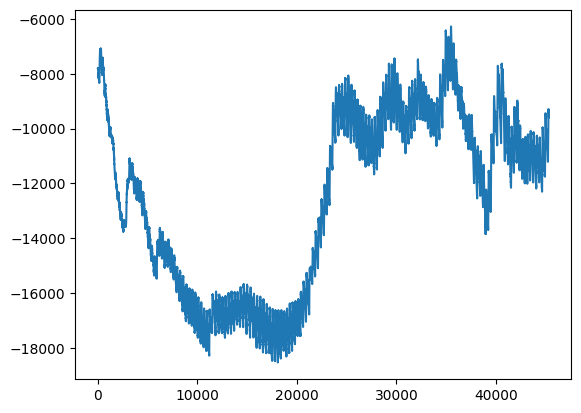

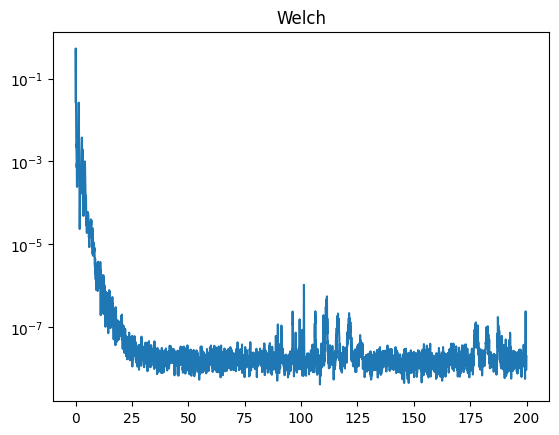

In [4]:
fs_ppg = 400 # Hz

# Cargar el archivo CSV como un array de NumPy
ppg = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1)  # Omitir la cabecera si existe

N = len(ppg)

f_ppg , ECG_ppg = sig.welch(ppg , fs = fs_ppg , nperseg = N/5 , axis = 0)

area_ppg = np.sum(ECG_ppg)

plt.figure()
plt.plot(ppg)
plt.figure()
plt.semilogy(f_ppg,ECG_ppg/area_ppg)
plt.title("Welch")
#plt.xlim(-50,0)
plt.ylim(-50,0)

## 5. Conclusiones